### DAY 1
##### TASK 1

In [35]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("Titanic-Dataset.csv")

In [24]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,B96 B98,False,True
1,1,1,0,38.0,1,0,71.2833,C85,False,False
2,1,3,0,26.0,0,0,7.9250,B96 B98,False,True
3,1,1,0,35.0,1,0,53.1000,C123,False,True
4,0,3,1,35.0,0,0,8.0500,B96 B98,False,True


In [4]:
data.shape

(891, 12)

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data.isnull().sum()/data.shape[0]*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [9]:
data.duplicated().sum()

np.int64(0)

In [10]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [11]:
df=data["Age"].fillna(data["Age"].mean(),inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_1668\4224185096.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df=data["Age"].fillna(data["Age"].mean(),inplace=True)


In [12]:
df=data["Cabin"].fillna(data["Cabin"].mode()[0],inplace=True)

df=data["Embarked"].fillna(data["Embarked"].mode()[0],inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_1668\1697325263.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df=data["Cabin"].fillna(data["Cabin"].mode()[0],inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_1668\1697325263.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [13]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
data.select_dtypes(include="object").columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [16]:
le=LabelEncoder()

data["Sex"]=le.fit_transform(data["Sex"])

In [17]:
data=pd.get_dummies(data,columns=["Embarked"],drop_first=True)

In [18]:
data.drop(["Name","Ticket","PassengerId"],axis=1,inplace=True)

In [29]:
sl=StandardScaler()

list1=["Age","Fare","SibSp","Parch"]

data[list1]=sl.fit_transform(data[list1])

In [32]:
msl=MinMaxScaler()
data[list1]=msl.fit_transform(data[list1])

In [37]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_Q,Embarked_S
0,0,3,1,0.271174,0.125,0.0,0.014151,B96 B98,False,True
1,1,1,0,0.472229,0.125,0.0,0.139136,C85,False,False
2,1,3,0,0.321438,0.000,0.0,0.015469,B96 B98,False,True
3,1,1,0,0.434531,0.125,0.0,0.103644,C123,False,True
4,0,3,1,0.434531,0.000,0.0,0.015713,B96 B98,False,True


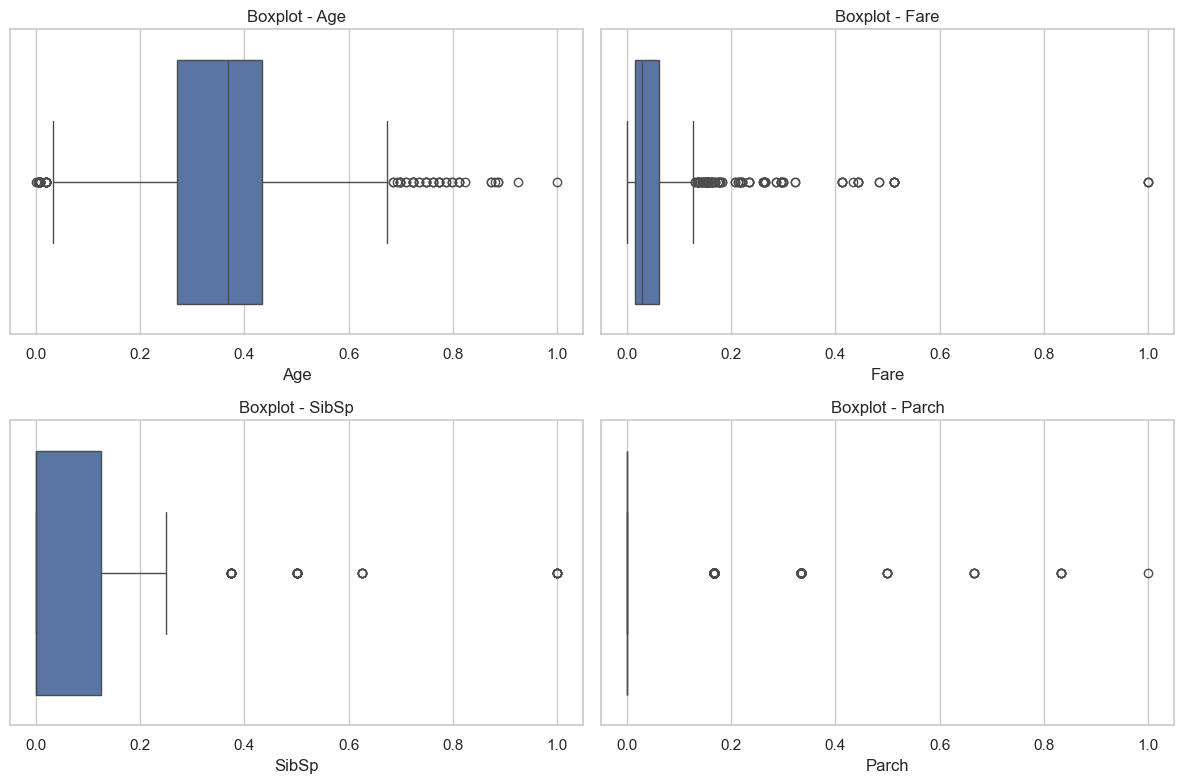

In [ ]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(list1, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot - {col}')
plt.tight_layout()
plt.show()